## Random Forest - Regression
## Plus: An Additional Analysis of Various Regression Methods!

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945,2.457
1,14.230,2.602
2,36.597,1.967
3,9.579,2.300
4,21.766,2.452


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [5]:
df.columns=["Signal","Density"]

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Signal,300.000,49.726,28.342,0.700,25.686,50.603,74.854,98.832
Density,300.000,2.225,0.315,1.500,1.988,2.269,2.477,2.750


<AxesSubplot:xlabel='Signal', ylabel='Density'>

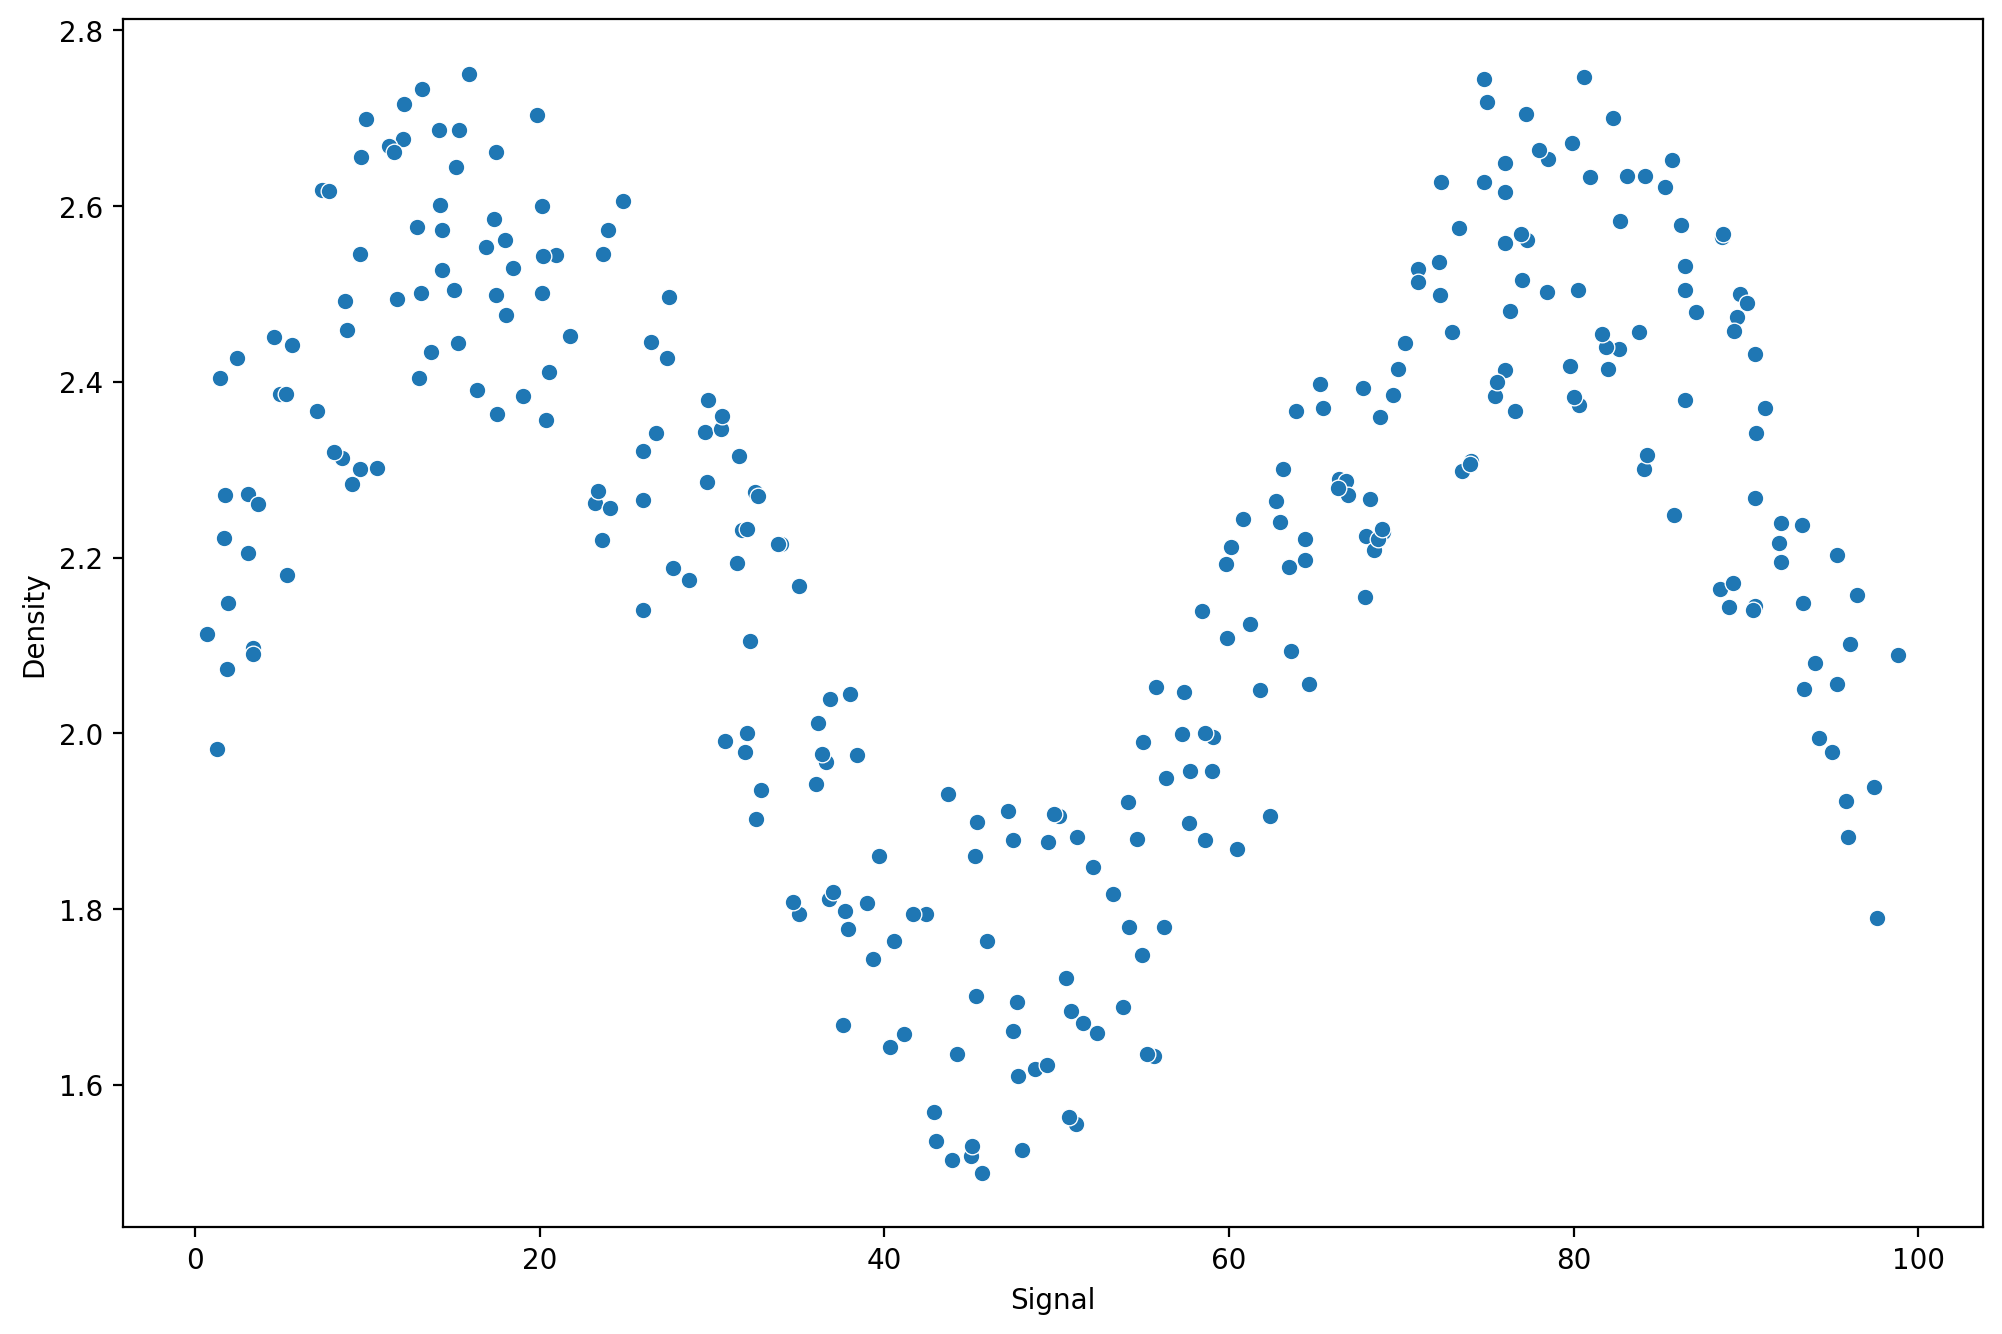

In [7]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

### Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [17]:
X = df['Signal'].values.reshape(-1,1) # Sadece bir tane feature mı olduğundan bunu DataFrame reshape(-1,1) ile yapıyoruz.
y = df['Density']                     # Çümkü Sckit-learn X train ve test datası için DataFrame istiyor. Y array ya da DataFrame olabilir.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
eval_metric(y_test, y_pred)

r2_score: -0.03426728142570257 
mae: 0.211198973318633 
mse: 0.0660516726514864 
rmse: 0.2570051996584629


r2_score = 1 - SSres / SStot

SSres is the sum of squares of the residual errors (y-y_pred).

SStot is the sum of squares of the errors (y-y_mean).

In [23]:
signal_range = np.arange(0,100)

In [ ]:
lr_output = lr.model.predict(signal_range, )

In [ ]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range, lr_output)

### Function to Help Run Models

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
 def run_model(model, X_train, y_train, X_test, y_test):
    # Fit Model
    model.fit(X_train, y_train)
    # Get Metrics
    y_pred = model.predict(X_test)
    eval_metric(y_test, y_pred)
    print("---------------------------------")
    # Plot results
    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1,1))
    

In [ ]:
plt.figure(figsize=(12,6), dpi=150)
    sns.scatterplot(x='Signal', y='Density', data=df, color='black')
    plt.plot(signal_range, output)

### Polynomial Regression

### Pipeline for Poly Orders

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [30]:
pipe = make_pipeline(PolynomialFeatures(6), LinearRegression()) # PolynomialFeatures bir model değil sadece dereceler ile features sayısını artırıyor. Burada önce PolynomialFeatures features ları fit-transform dan sonra Linear modele uygulanıyor.

r2_score: 0.7014736993951337 
mae: 0.11969195881837104 
mse: 0.01906486054381517 
rmse: 0.13807556099402662
---------------------------------


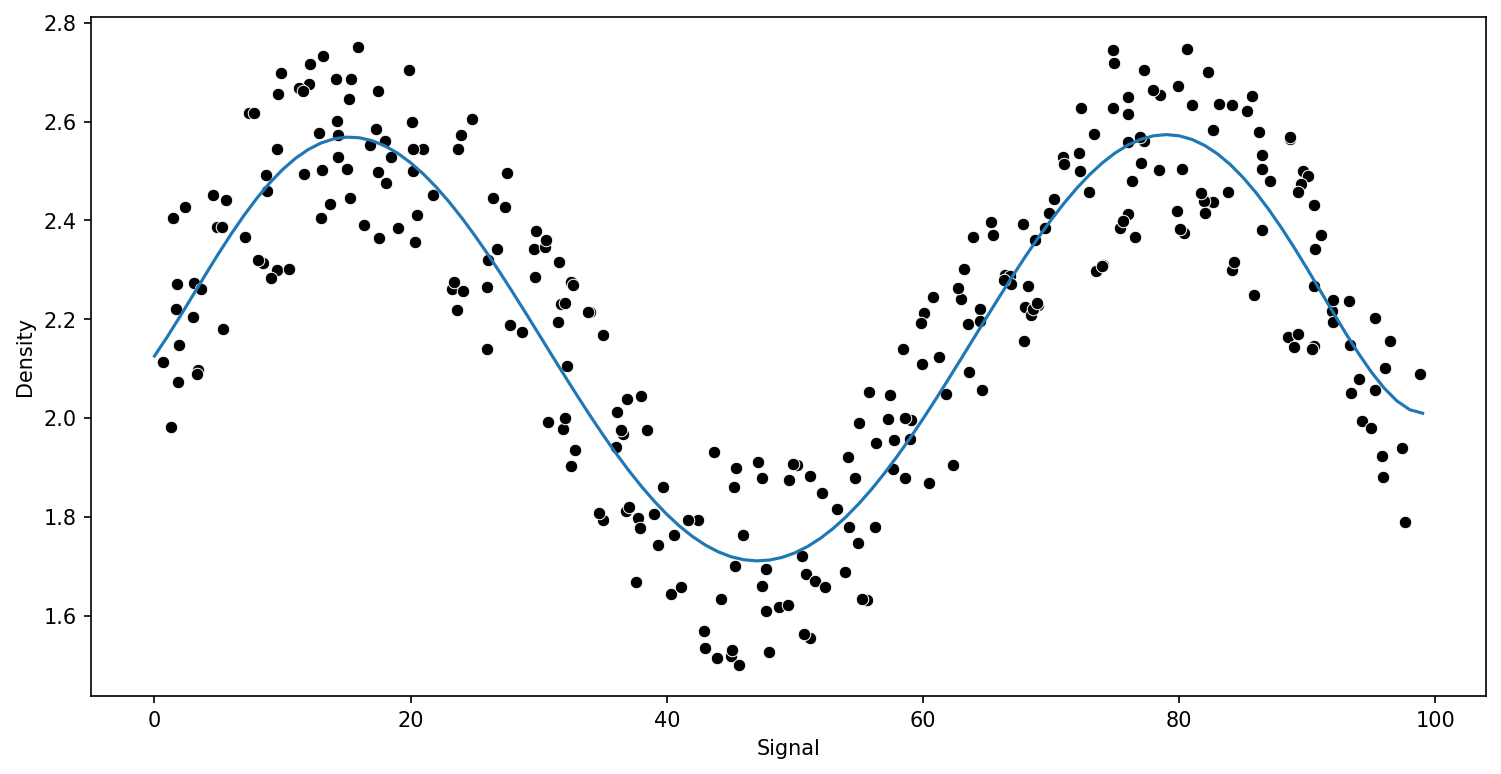

In [31]:
run_model(pipe, X_train, y_train, X_test, y_test)

### KNN Regression

In [27]:
from sklearn.neighbors import KNeighborsRegressor

r2_score: 0.6365652183593897 
mae: 0.11877297474442378 
mse: 0.023210127264201276 
rmse: 0.1523487028635337
---------------------------------
r2_score: 0.7047884294126898 
mae: 0.12198383614100558 
mse: 0.01885317110339715 
rmse: 0.13730685016923647
---------------------------------
r2_score: 0.7239391266857286 
mae: 0.11635971693292672 
mse: 0.017630145285948105 
rmse: 0.13277855732740926
---------------------------------
r2_score: 0.6941897364355127 
mae: 0.1207030971917154 
mse: 0.019530038110247734 
rmse: 0.1397499127378895
---------------------------------
r2_score: 0.6014333811613786 
mae: 0.13363165935705318 
mse: 0.025453760657543845 
rmse: 0.15954234753677107
---------------------------------


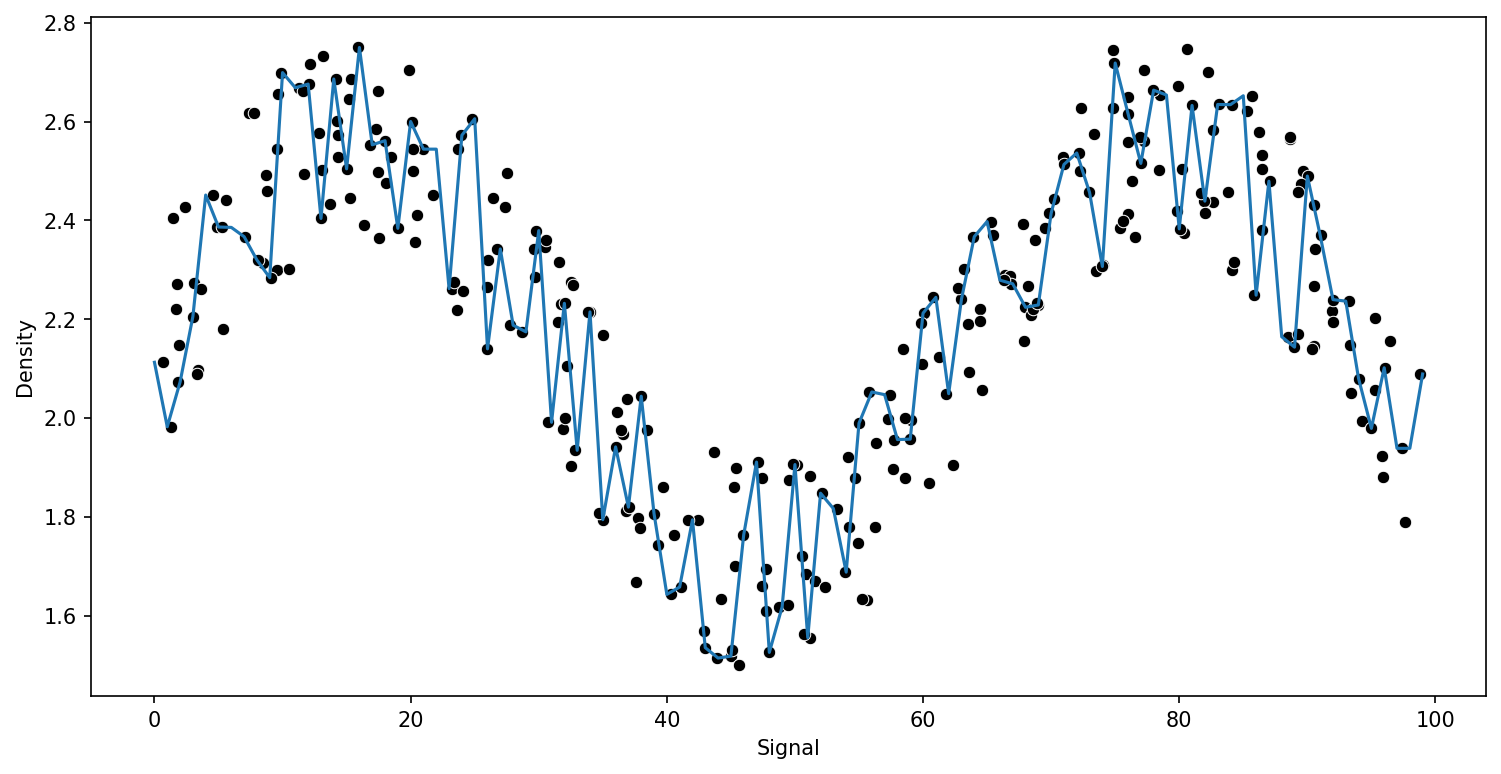

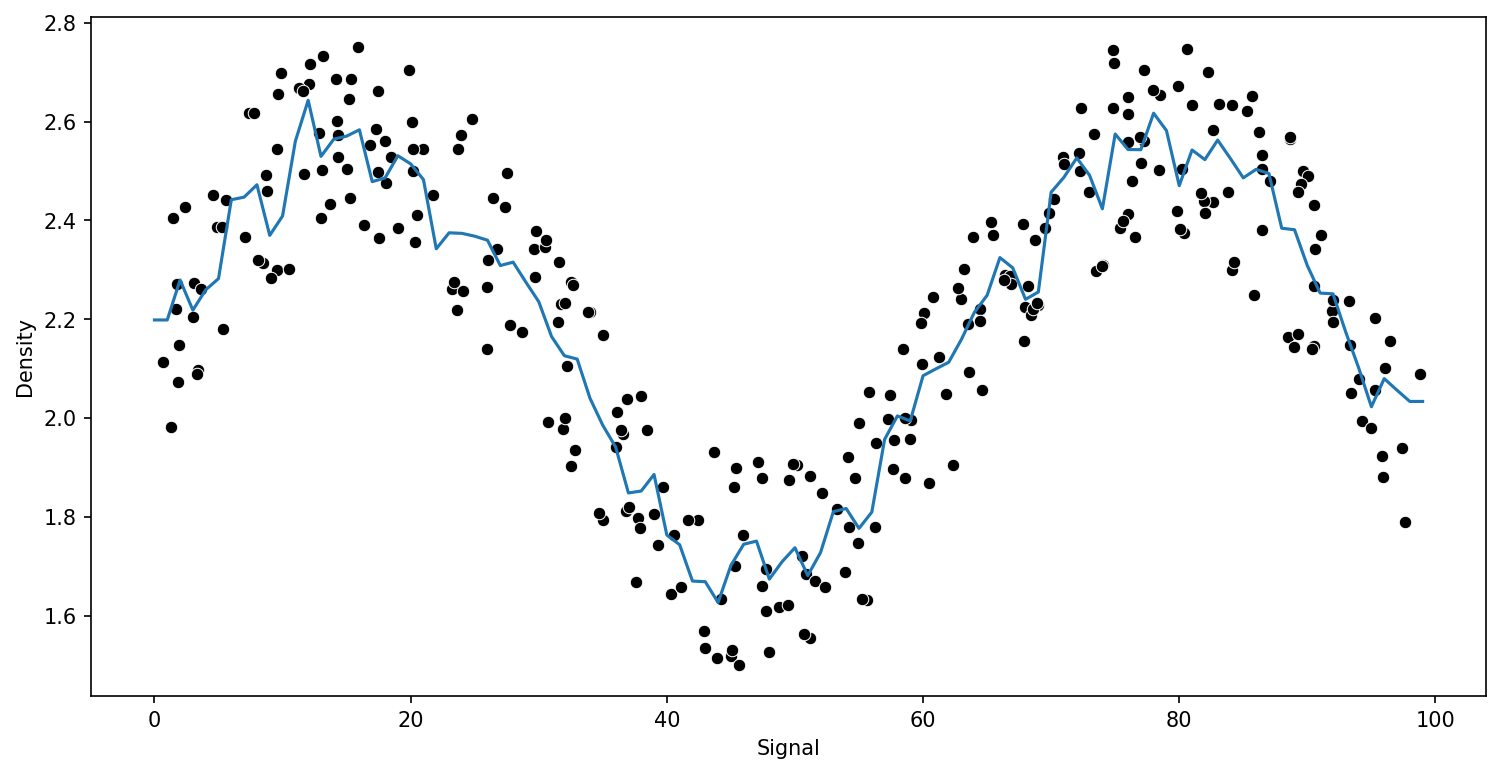

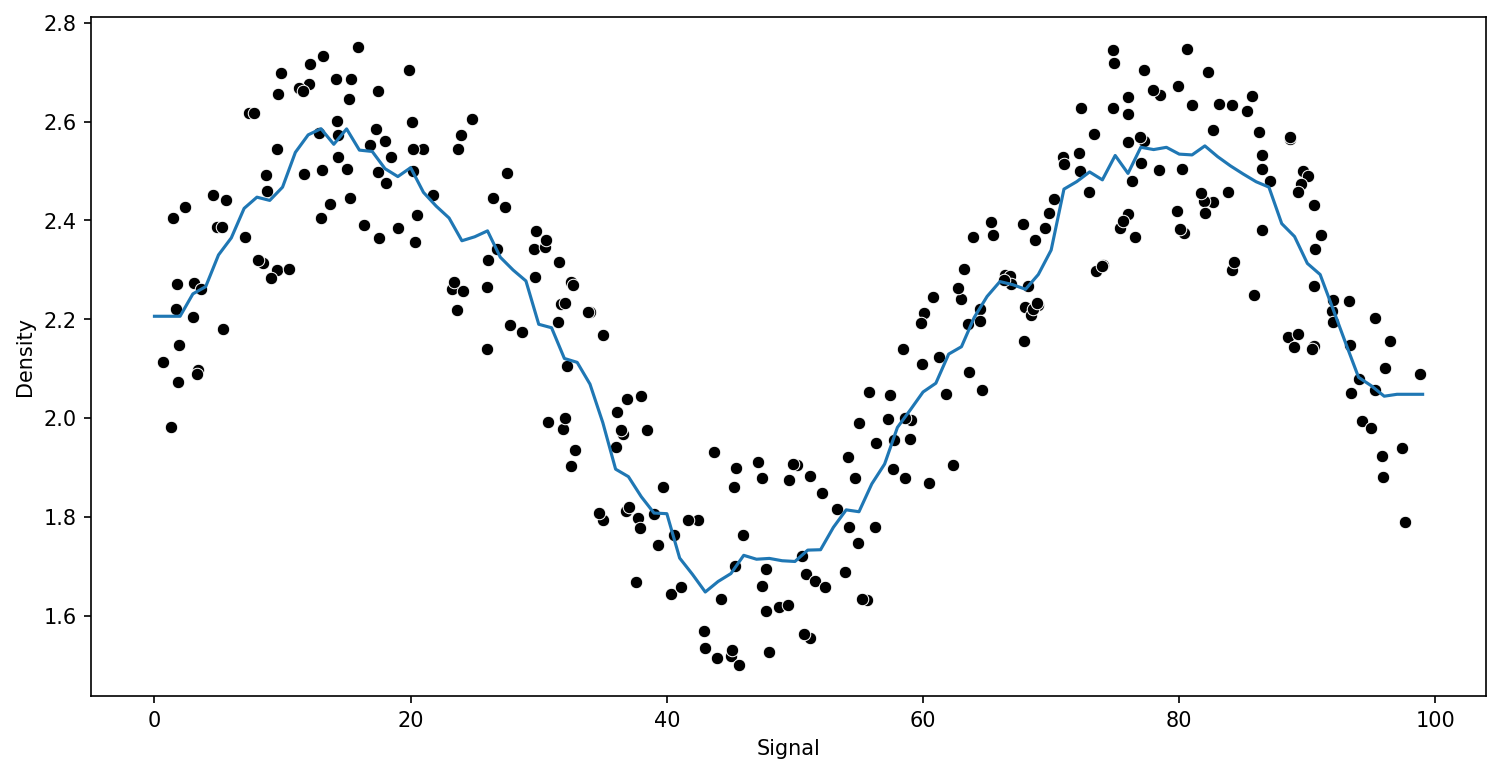

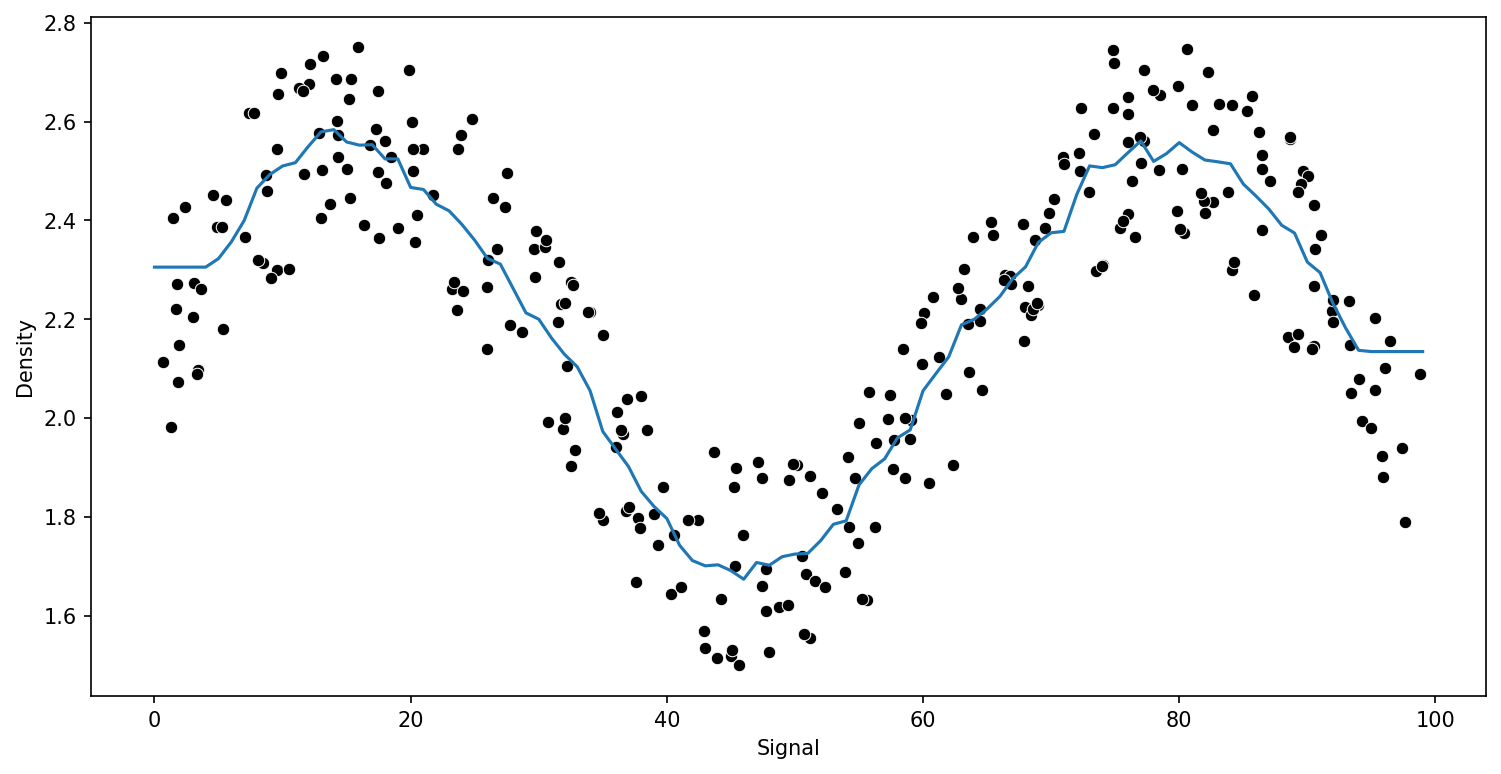

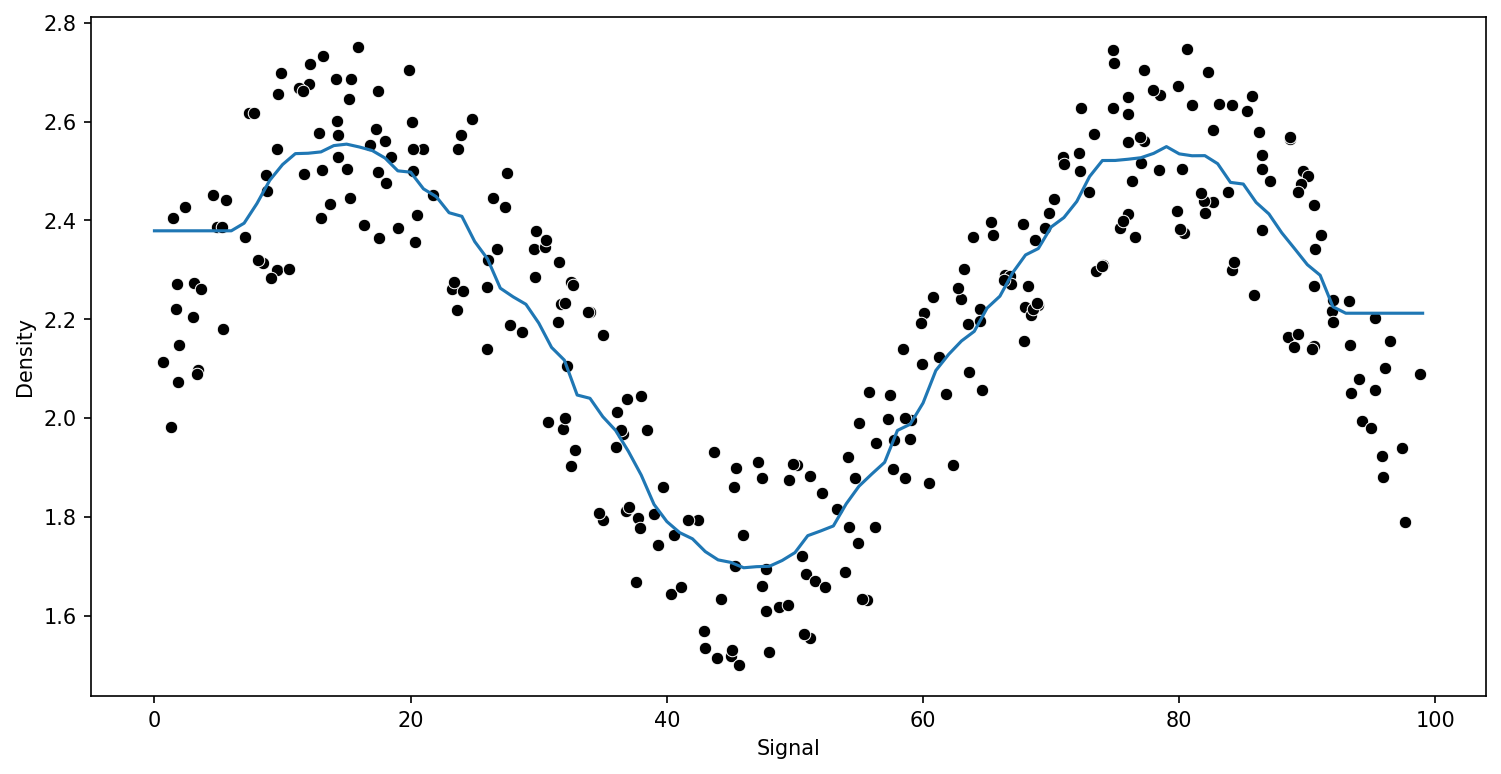

In [28]:
preds = {}
k_values = [1,5,10,20,30]
for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

### Support Vector Regression

In [32]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

r2_score: 0.7495483163952796 
mae: 0.10854210121349125 
mse: 0.01599465913459914 
rmse: 0.12646999302047557
---------------------------------


{'C': 1000, 'gamma': 'scale'}

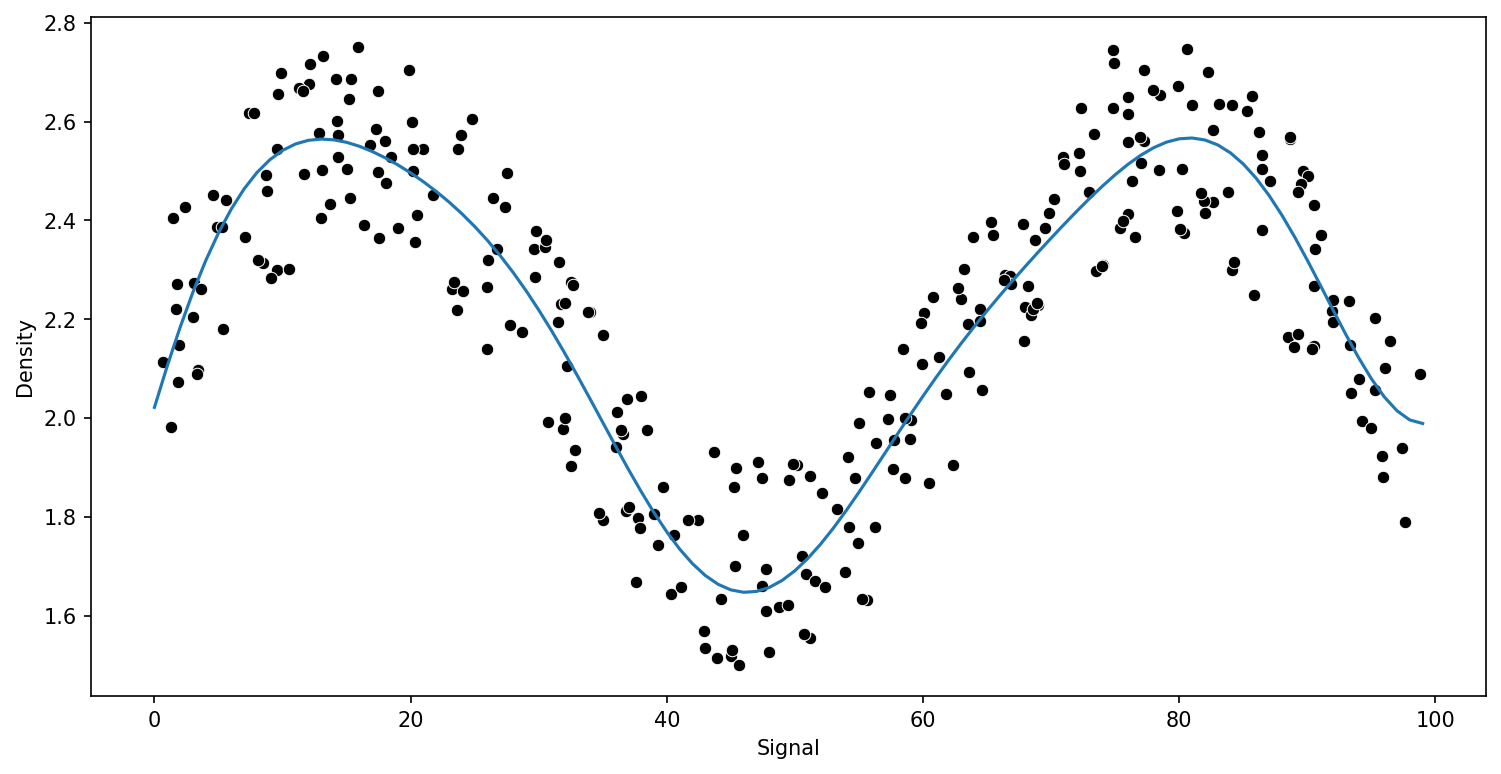

In [33]:
svr_model = SVR()
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr_grid_model = GridSearchCV(svr_model, param_grid)
run_model(svr_grid_model, X_train, y_train, X_test, y_test)
svr_grid_model.best_params_

### Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor

r2_score: 0.6365652183593897 
mae: 0.11877297474442378 
mse: 0.023210127264201276 
rmse: 0.1523487028635337
---------------------------------


270

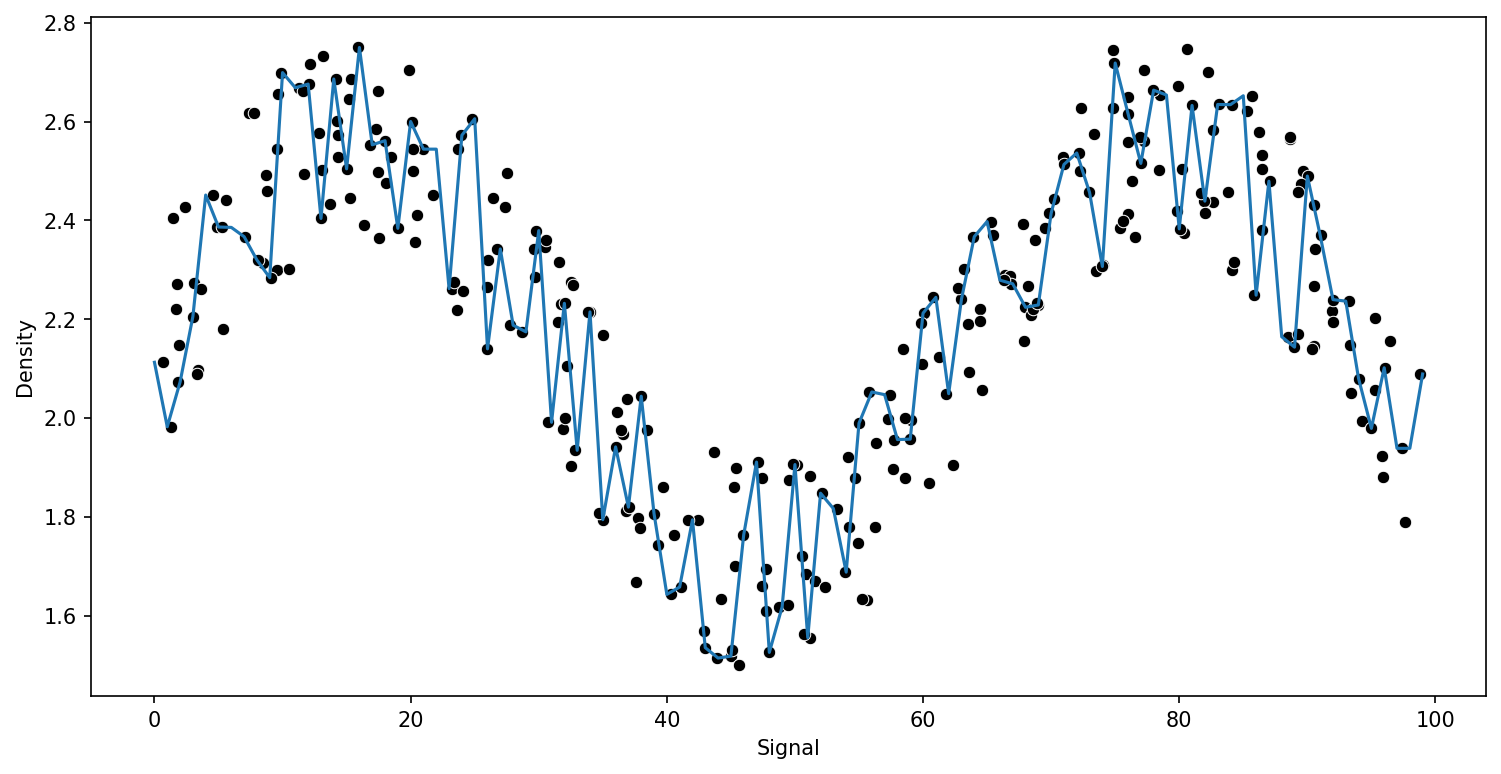

In [35]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)
model.get_n_leaves()

### Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor # Random forest features seçerken default olarak toplam features ın karekökü kadar features alarak seçim yapıyor  

r2_score: 0.7443289578421373 
mae: 0.10320131709018218 
mse: 0.016327984348297932 
rmse: 0.12778100151547542
---------------------------------
r2_score: 0.7303606152963791 
mae: 0.10948140253120078 
mse: 0.017220048136726434 
rmse: 0.1312251810314104
---------------------------------
r2_score: 0.7282137604418071 
mae: 0.11105724179730889 
mse: 0.0173571532706034 
rmse: 0.13174654936886734
---------------------------------


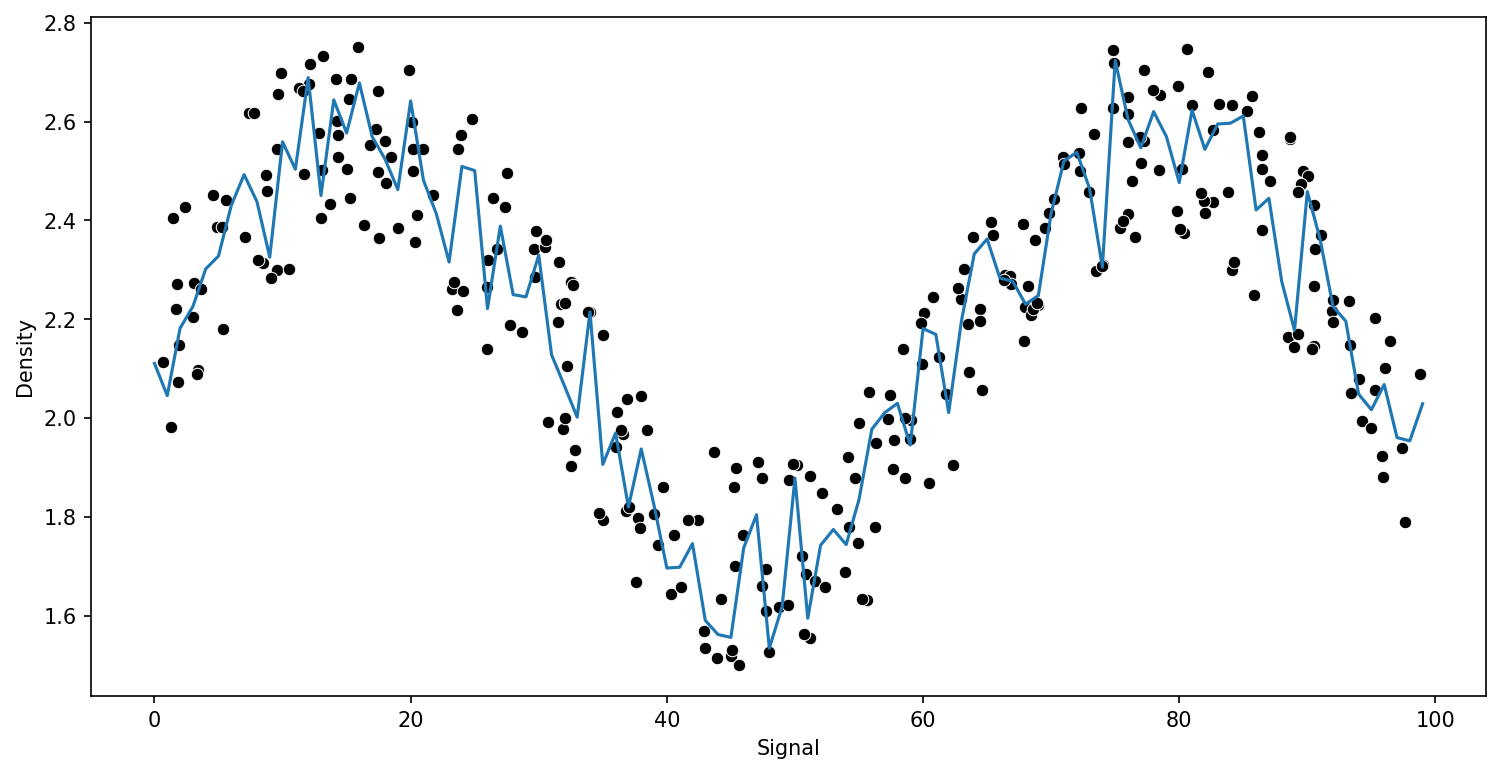

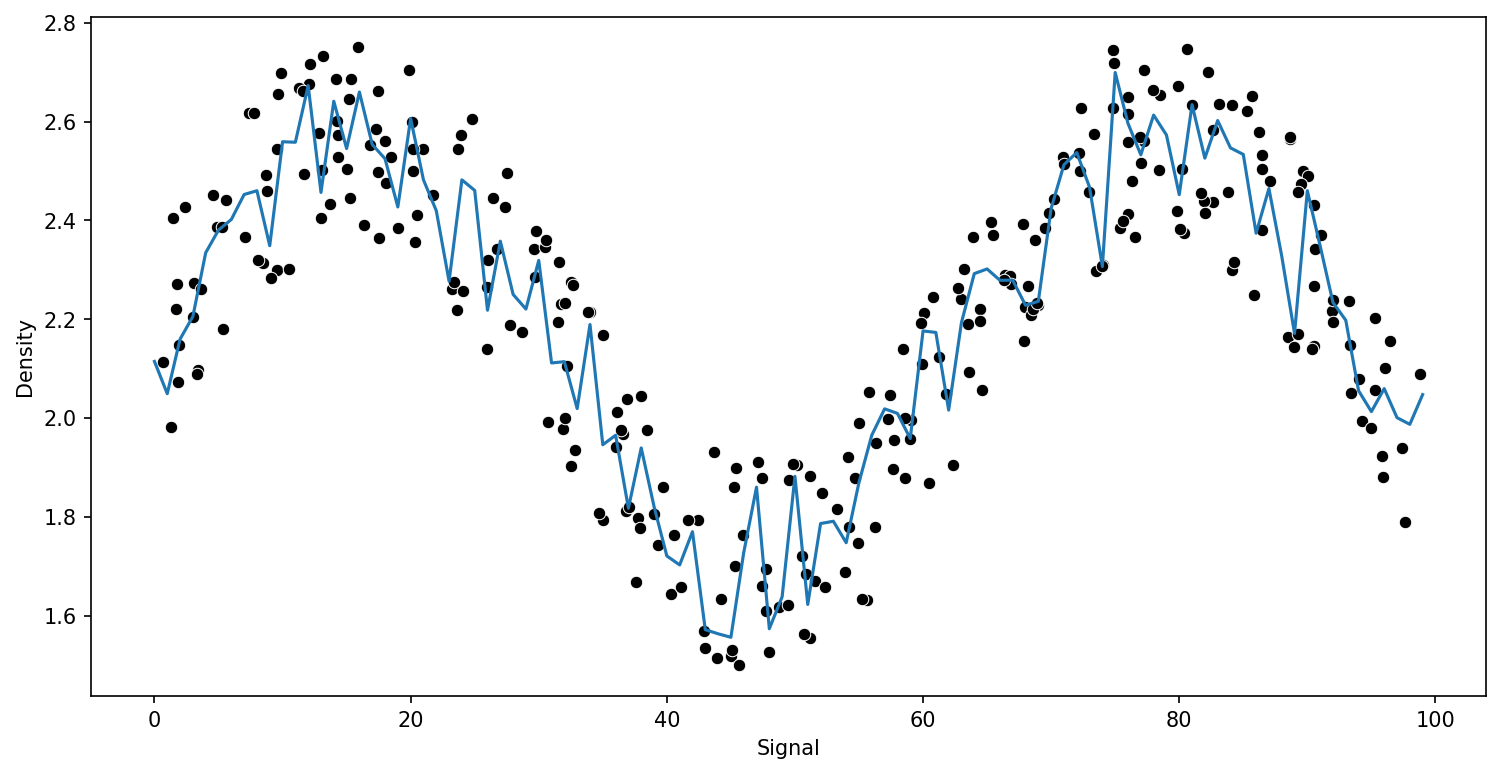

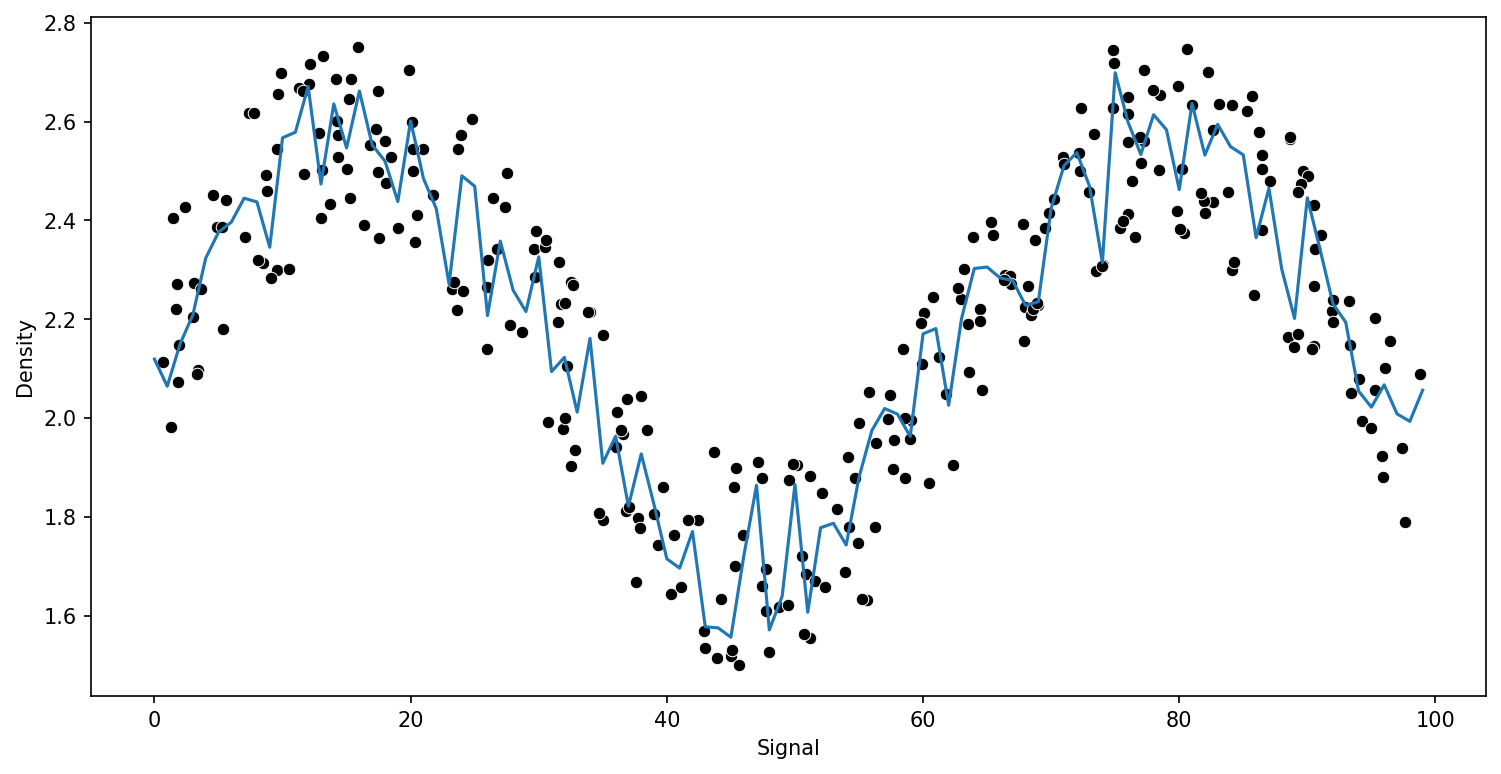

In [37]:
trees = [10,50,100]
for n in trees:
    model = RandomForestRegressor(n_estimators=n, random_state = 101)
    run_model(model, X_train, y_train, X_test, y_test)

### Gradient Boosting

We will cover this in more detail in next section.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

<IPython.core.display.Javascript object>

r2_score: 0.7232612165572356 
mae: 0.11318284854800689 
mse: 0.01767343883172538 
rmse: 0.13294148649584667
---------------------------------


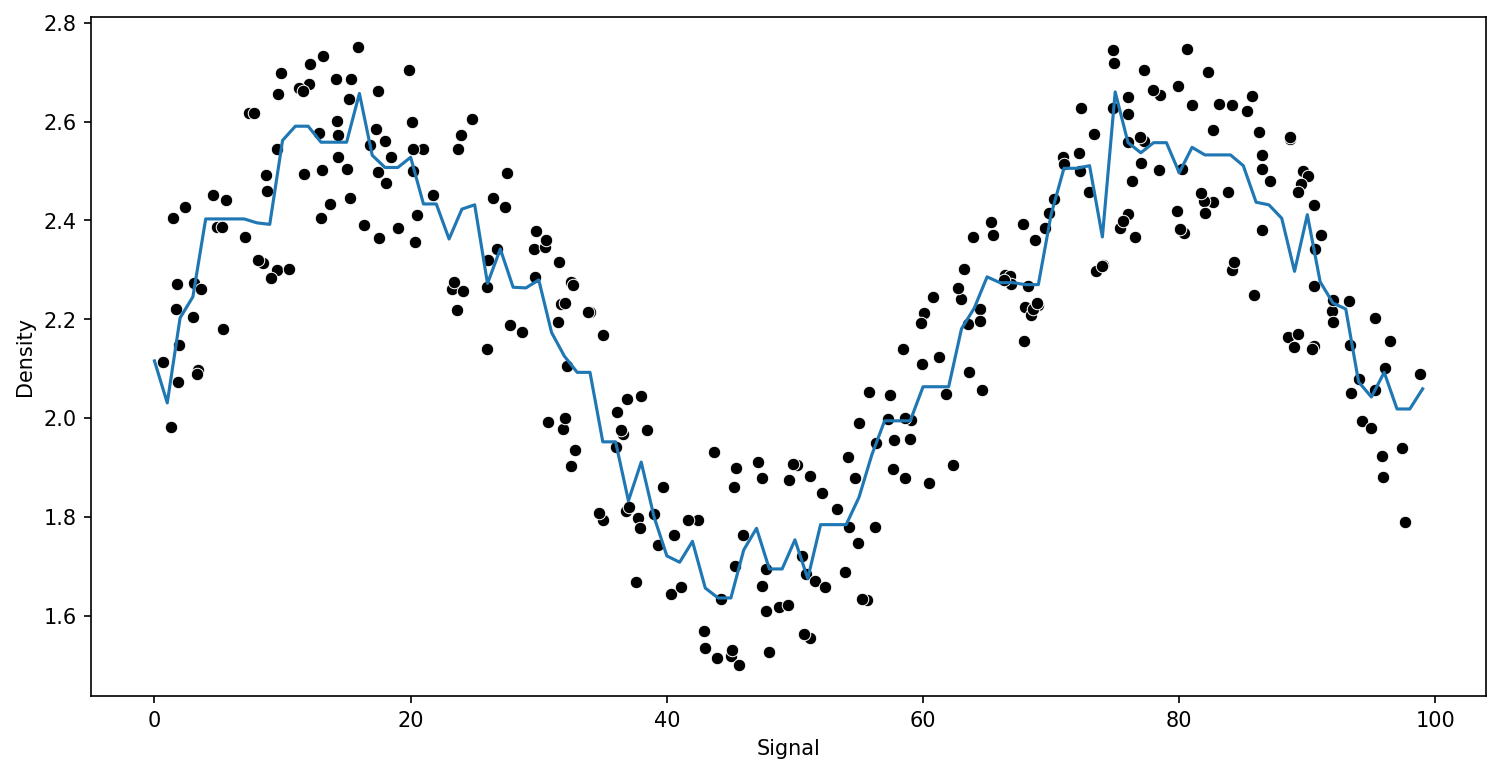

In [38]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

### Adaboost

In [39]:
from sklearn.ensemble import AdaBoostRegressor

r2_score: 0.7168894862970568 
mae: 0.11452906180828264 
mse: 0.018080358250841835 
rmse: 0.13446322267014812
---------------------------------


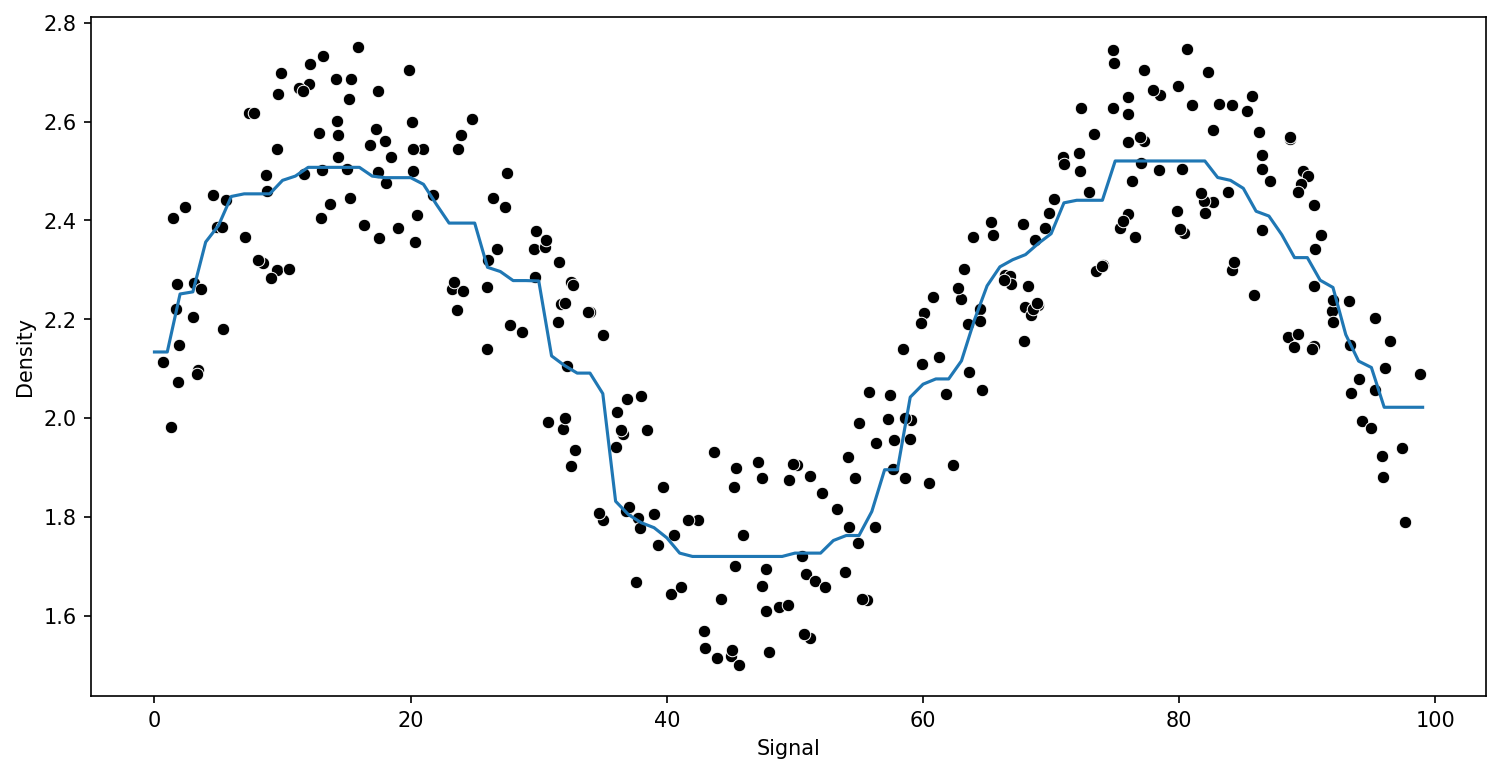

In [40]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)